## Machine Learning
 #### AI with Data
 #### Supervised Learning       y <--> x
 #### Gradient descent Algorithm  
     B_j <--- B_j - $\alpha \frac{\part{E(B_j)}}{\part{B_j}}$

In [1]:
import pandas as pd

data_df = pd.read_csv("./data_regression.csv", index_col = "Id")
data_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [2]:
data_df.shape 

(1460, 80)

## Data Preparation for Machine Learning 

In [10]:
data_df.fillna(data_df.median(), inplace = True)
data_df.fillna(data_df.mode(), inplace = True)

In [12]:
from sklearn.preprocessing import LabelEncoder

col_cat = data_df.select_dtypes(include=[object]).columns
data_df_enc = data_df.copy()

data_df_enc[col_cat] = data_df_enc[col_cat].fillna("0")

for col in col_cat:
    
    le = LabelEncoder()
    
    data_df_enc[col] = le.fit_transform(data_df_enc[col])
    
data_df_enc

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
6,50,3,85.0,14115,1,0,0,3,0,4,...,0,0,3,3,700,10,2009,8,4,143000
7,20,3,75.0,10084,1,0,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,307000
8,60,3,69.0,10382,1,0,0,3,0,0,...,0,0,0,3,350,11,2009,8,4,200000
9,50,4,51.0,6120,1,0,3,3,0,4,...,0,0,0,0,0,4,2008,8,0,129900


In [7]:
data_df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [13]:
data_df_oh = pd.get_dummies(data_df)
data_df_oh

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
6,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0
7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,1,0,0,0,0,1,0
8,60,69.0,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,1,0,0,0,0,1,0
9,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [16]:
data_df_enc.fillna(data_df_enc.median(), inplace = True)
data_df_oh.fillna(data_df_enc.median(), inplace = True)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
6,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,1,0,0,0,0,1,0
7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,1,0,0,0,0,1,0
8,60,69.0,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,1,0,0,0,0,1,0
9,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [18]:
data_df_enc.isnull().any().any()

False

In [19]:
from sklearn.model_selection import train_test_split

y = data_df["SalePrice"]
x_oh = data_df_oh.drop("SalePrice", 1)
x_enc = data_df_enc.drop("SalePrice", 1)


x_oh_train, x_oh_test,x_enc_train, x_enc_test, y_train, y_test = train_test_split(x_oh, 
                                                                                  x_enc, 
                                                                                  y, 
                                                                                  test_size=0.4, 
                                                                                  random_state=42)


print(x_oh.shape)
print(x_oh_train.shape)
print(x_oh_test.shape)

(1460, 288)
(876, 288)
(584, 288)


In [22]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(x_enc_train, y_train)
lr.predict(x_enc_test)

array([ 148834.04524612,  318453.51113612,  111429.69916345,
        177969.4814059 ,  316996.88413212,   73739.75463534,
        230314.9938779 ,  143122.73445225,   76826.28158804,
        162385.92255726,  143758.1742398 ,  108051.6465114 ,
         68718.66450931,  208100.48191855,  162264.24153853,
        139226.58330493,  209233.55079401,  121272.72951982,
        116264.49479584,  230441.81446797,  138763.9359499 ,
        209137.27132573,  189617.78994121,  122434.59249816,
        211400.0265047 ,  158752.60045489,  204560.52460972,
         74246.62518998,  163560.60863781,  190582.22833657,
        170769.2364806 ,  264214.59702   ,  196452.30872497,
         92569.21841648,  259823.61029081,  149229.79928878,
        126103.80524349,  214350.53327994,  284578.14937282,
        100482.61169409,  113898.36191172,  251598.92687157,
        107475.91299507,  327891.38929216,  128317.84438171,
        144461.01760527,   94368.19984382,  134183.48900956,
        393913.66486249,

In [26]:
lr_oh = LinearRegression()
lr_oh.fit(x_oh_train, y_train)

lr_enc = LinearRegression()
lr_enc.fit(x_enc_train, y_train)


pred_df = pd.DataFrame({"target": y_test, 
                       "prediction_oh": lr_oh.predict(x_oh_test),
                       "prediction_enc": lr_enc.predict(x_enc_test)})
pred_df

,prediction_enc,prediction_oh,target
Id,,,
893,148834.045246,157765.729742,154500
1106,318453.511136,349109.277957,325000
414,111429.699163,95096.302085,115000
523,177969.481406,184596.660907,159000
1037,316996.884132,325361.250007,315500
615,73739.754635,77488.465078,75500
219,230314.993878,241351.475985,311500
1161,143122.734452,145584.760836,146000
650,76826.281588,72259.553189,84500


In [30]:
((pred_df["target"] - pred_df["prediction_oh"]).pow(2).mean())**0.5

29602.64319019789

In [31]:
from sklearn import metrics
import numpy as np

print(np.sqrt(metrics.mean_squared_error(pred_df["target"], pred_df["prediction_oh"])))
print(np.sqrt(metrics.mean_squared_error(pred_df["target"], pred_df["prediction_enc"])))

29602.6431902
32651.3521972


In [33]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


ln_rg = LinearRegression()
en_rg = ElasticNet()
tree_rg = DecisionTreeRegressor()
rf_rg = RandomForestRegressor()




In [35]:


ln_rg.fit(x_enc_train, y_train)
en_rg.fit(x_enc_train, y_train)
tree_rg.fit(x_enc_train, y_train)
rf_rg.fit(x_enc_train, y_train)

pred_df = pd.DataFrame({"target": y_test, 
                       "pred_lr": ln_rg.predict(x_enc_test),
                       "pred_en": en_rg.predict(x_enc_test), 
                       "pred_tree": tree_rg.predict(x_enc_test), 
                       "pred_rf": rf_rg.predict(x_enc_test)})
pred_df

/Users/cphys-590/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,pred_en,pred_lr,pred_rf,pred_tree,target
Id,,,,,
893,155078.985199,148834.045246,128290.0,136000.0,154500
1106,310218.125205,318453.511136,336350.0,235000.0,325000
414,106356.927119,111429.699163,126880.0,128000.0,115000
523,163898.069016,177969.481406,156420.0,148500.0,159000
1037,305552.852071,316996.884132,337415.9,320000.0,315500
615,71544.026067,73739.754635,82300.0,81000.0,75500
219,228123.068252,230314.993878,229429.0,219500.0,311500
1161,145405.745915,143122.734452,154150.0,148500.0,146000
650,71108.926573,76826.281588,83600.0,80000.0,84500


In [36]:
pred_df.apply(lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5).sort_values(ascending=True)

target           0.000000
pred_rf      29806.337184
pred_lr      32651.352197
pred_en      36220.447934
pred_tree    40875.654103
dtype: float64

In [37]:
ln_rg.fit(x_oh_train, y_train)
en_rg.fit(x_oh_train, y_train)
tree_rg.fit(x_oh_train, y_train)
rf_rg.fit(x_oh_train, y_train)

pred_df = pd.DataFrame({"target": y_test, 
                       "pred_lr": ln_rg.predict(x_oh_test),
                       "pred_en": en_rg.predict(x_oh_test), 
                       "pred_tree": tree_rg.predict(x_oh_test), 
                       "pred_rf": rf_rg.predict(x_oh_test)})
pred_df

/Users/cphys-590/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,pred_en,pred_lr,pred_rf,pred_tree,target
Id,,,,,
893,156878.628286,157765.729742,140970.0,152000.0,154500
1106,301835.188079,349109.277957,350226.1,260000.0,325000
414,101778.388493,95096.302085,137700.0,107000.0,115000
523,161692.751954,184596.660907,157150.0,152000.0,159000
1037,296364.757437,325361.250007,330085.1,326000.0,315500
615,59157.648319,77488.465078,85950.0,81000.0,75500
219,224996.206119,241351.475985,204317.8,193000.0,311500
1161,142465.295479,145584.760836,150790.0,148500.0,146000
650,55347.083894,72259.553189,86700.0,79000.0,84500


In [38]:
pred_df.apply(lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5).sort_values(ascending=True)

target           0.000000
pred_lr      29602.643190
pred_rf      30915.749747
pred_en      36567.700419
pred_tree    45946.963117
dtype: float64

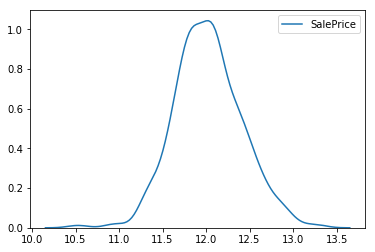

In [40]:
%matplotlib inline
import seaborn as sns

sns.kdeplot(np.log(y_train))

In [44]:
ln_rg.fit(x_oh_train, np.log(y_train))
en_rg.fit(x_oh_train, np.log(y_train))
tree_rg.fit(x_oh_train, np.log(y_train))
rf_rg.fit(x_oh_train, np.log(y_train))

pred_df = pd.DataFrame({"target": y_test, 
                       "pred_lr": np.exp(ln_rg.predict(x_oh_test)),
                       "pred_en": np.exp(en_rg.predict(x_oh_test)), 
                       "pred_tree": np.exp(tree_rg.predict(x_oh_test)), 
                       "pred_rf": np.exp(rf_rg.predict(x_oh_test))})
pred_df

,pred_en,pred_lr,pred_rf,pred_tree,target
Id,,,,,
893,141693.658703,152750.226641,140148.989435,148000.000000,154500
1106,301667.478397,351652.113756,305551.826983,278000.000000,325000
414,106216.415264,105277.278388,126662.478868,162000.000000,115000
523,139403.806189,167545.612388,154140.649740,185000.000000,159000
1037,263673.967017,317897.223500,329247.563735,320000.000000,315500
615,92441.329795,82291.082346,82485.416880,81000.000000,75500
219,176480.348155,254064.581719,210955.027588,176000.000000,311500
1161,146866.931672,145895.955323,142795.181137,147000.000000,146000
650,89956.911572,78982.703751,83188.694652,80000.000000,84500


In [45]:
pred_df.apply(lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5).sort_values(ascending=True)

target           0.000000
pred_lr      22986.480923
pred_rf      30060.811293
pred_en      35805.485907
pred_tree    43777.816091
dtype: float64

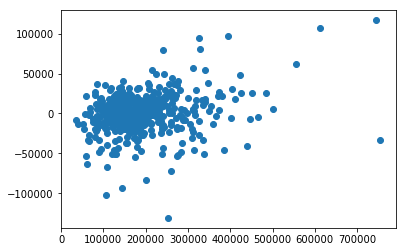

In [46]:
import matplotlib.pyplot as plt

plt.scatter(pred_df["target"], pred_df["target"] - pred_df["pred_lr"])